In [ ]:
import warnings
warnings.filterwarnings('ignore')

## Homework

### Dataset

In this homework, we will use the California Housing Prices from [Kaggle](https://www.kaggle.com/datasets/camnugent/california-housing-prices).

We had already downloaded the data to GCS for last week's homework, so today we created a BigQuery table for it.

### EDA

In [ ]:
# LOADING THE DATA:
import bigframes.pandas as bpd

# Variables
PROJECT_ID = 'dz-learning-d'
DATASET = 'ML_ZOOMCAMP_HW'
TABLE = 'HOUSING'
BUCKET_NAME = 'dz-d-stg-us-ml-zoomcamp'

bpd.options.bigquery.project = PROJECT_ID
df = bpd.read_gbq(f"{PROJECT_ID}.{DATASET}.{TABLE}")

HTML(value='Query job 0f987a64-0f90-43a2-8950-8eb41f9afb6e is RUNNING. <a target="_blank" href="https://consol…

In [ ]:
df.head()

HTML(value='Query job 9cc650ed-f648-4e6f-9c81-28aa02916125 is DONE. 165.1 kB processed. <a target="_blank" hre…

HTML(value='Query job 62a8b168-0e70-47a5-b0e1-aaa1d606b5b4 is DONE. 1.9 MB processed. <a target="_blank" href=…

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-116.0,33.19,16.0,245.0,57.0,81.0,33.0,1.2639,51300.0,INLAND
1,-116.0,32.74,26.0,1134.0,280.0,329.0,158.0,1.4338,43900.0,INLAND
2,-116.0,34.12,32.0,3163.0,712.0,1358.0,544.0,2.125,57700.0,INLAND
3,-120.0,38.52,16.0,3045.0,543.0,202.0,102.0,3.15,140600.0,INLAND
4,-120.0,38.93,17.0,8005.0,1382.0,999.0,383.0,3.9722,313400.0,INLAND


In [ ]:
df.dtypes

longitude                     Float64
latitude                      Float64
housing_median_age            Float64
total_rooms                   Float64
total_bedrooms                Float64
population                    Float64
households                    Float64
median_income                 Float64
median_house_value            Float64
ocean_proximity       string[pyarrow]
dtype: object

We'll work with pandas to reproduce homework results.

In [ ]:
df_pd = df.to_pandas()

HTML(value='Query job 6782de1e-d1bf-42ef-b8a5-1c4d8360e47e is DONE. 1.9 MB processed. <a target="_blank" href=…

<Axes: xlabel='median_house_value', ylabel='Count'>

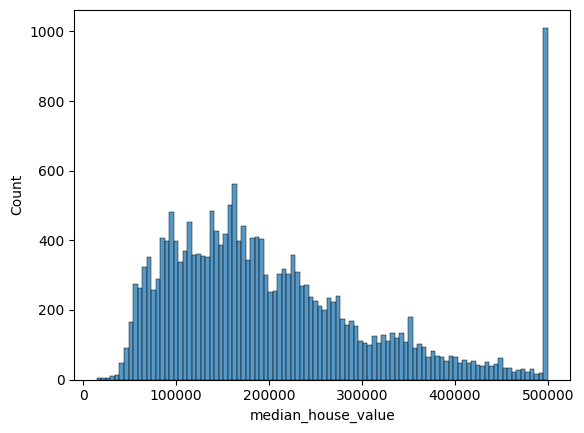

In [ ]:
# Look at the `median_house_value` variable. Does it have a long tail? 
import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline
sns.histplot(df_pd.median_house_value, bins = 100)

We can observe how the distribution is skewed to the right (long right tail).

In [ ]:
max_med_house_val = df_pd.median_house_value.max()
count_max = df_pd.median_house_value[df_pd.median_house_value == max_med_house_val].count()

print(f"We can also observe {count_max} rows with the maximun median house value ({max_med_house_val}).")

We can also observe 965 rows with the maximun median house value (500001.0).


### Preparing the dataset 

For this homework, we only want to use a subset of data. 

First, keep only the records where `ocean_proximity` is either `'<1H OCEAN'` or `'INLAND'`

In [ ]:
df_pd = df_pd[
    (df_pd.ocean_proximity == '<1H OCEAN') |  (df_pd.ocean_proximity == 'INLAND')
]

Next, use only the following columns:

* `'latitude'`,
* `'longitude'`,
* `'housing_median_age'`,
* `'total_rooms'`,
* `'total_bedrooms'`,
* `'population'`,
* `'households'`,
* `'median_income'`,
* `'median_house_value'`

In [ ]:
columns = ['latitude', 'longitude', 'housing_median_age', 'total_rooms', 
            'total_bedrooms', 'population', 'households', 'median_income', 
            'median_house_value']
df_pd = df_pd[columns]

### Question 1

There's one feature with missing values. What is it?

* `total_rooms`
* `total_bedrooms`✅
* `population`
* `households`

In [ ]:
df_pd.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

### Question 2

What's the median (50% percentile) for variable `'population'`?

- 995
- 1095
- 1195✅
- 1295

In [ ]:
df_pd.describe()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,15687.0,15687.0,15687.0,15687.0,15530.0,15687.0,15687.0,15687.0,15687.0
mean,35.467307,-119.217442,27.188118,2665.677312,541.244688,1466.317205,500.916491,3.804019,191943.020017
std,2.066387,1.78038,12.057128,2257.672743,435.650018,1180.389908,392.759399,1.857158,108801.07762
min,32.61,-124.14,1.0,2.0,2.0,3.0,2.0,0.4999,14999.0
25%,33.94,-121.07,17.0,1441.0,295.0,802.0,278.0,2.5208,111300.0
50%,34.16,-118.37,27.0,2118.0,432.0,1195.0,406.0,3.4688,166900.0
75%,37.34,-117.99,36.0,3172.0,645.0,1777.0,602.0,4.6862,241100.0
max,41.95,-114.31,52.0,39320.0,6445.0,35682.0,6082.0,15.0001,500001.0


In [ ]:
print('The median of the population is: ', df_pd.population.median())

The median of the population is:  1195.0


### Prepare and split the dataset

* Apply the log transformation to the `median_house_value` variable using the `np.log1p()` function.

<Axes: xlabel='log_median_house_value', ylabel='Count'>

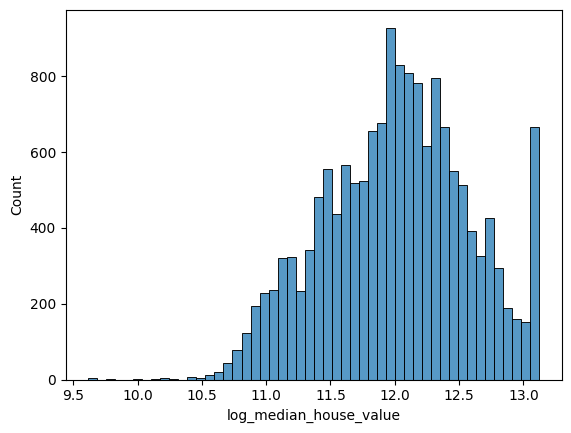

In [ ]:
df_pd['log_median_house_value'] = np.log1p(df_pd.median_house_value)

sns.histplot(df_pd.log_median_house_value, bins = 50)

* Shuffle the dataset (the filtered one you created above), and use seed `42`.

In [ ]:
import numpy as np

np.random.seed(42)

n = len(df_pd)

idx = np.arange(n)
np.random.shuffle(idx)

# Sguffled dataset:
df_shuffled = df_pd.iloc[idx]
df_shuffled.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,log_median_house_value
17478,33.98,-118.18,30.0,1735.0,573.0,2237.0,545.0,2.3444,156100.0,11.958259
4469,36.72,-119.81,46.0,1414.0,268.0,902.0,243.0,1.5833,56700.0,10.945547
11611,34.2,-118.37,33.0,1438.0,309.0,1378.0,306.0,2.8917,170400.0,12.04591
4983,36.93,-119.88,12.0,3174.0,520.0,1590.0,488.0,4.5347,101200.0,11.524864
15449,33.76,-117.88,17.0,1768.0,474.0,1079.0,436.0,1.7823,205300.0,12.232232


* Split your data in train/val/test sets, with 60%/20%/20% distribution.

In [ ]:
n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

### Question 3

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using `round(score, 2)`
* Which option gives better RMSE?

Options:

- With 0
- With mean
- Both are equally good ✅

In [ ]:
df_train.columns.to_list()

['latitude',
 'longitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value',
 'log_median_house_value']

In [ ]:
features = ['latitude',
 'longitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

def prepare_X(df, fill = 0):
    df_ = df[features].copy()
    df_.total_bedrooms = df_.total_bedrooms.fillna(value = fill)
    X = df_.values.astype(float)
    return X

In [ ]:
# Fitting linear regression
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [ ]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [ ]:
# Prepare label:
y_train = df_train.log_median_house_value.values
y_val = df_val.log_median_house_value.values
y_test = df_test.log_median_house_value.values

In [ ]:
# Train model and compare RMSE's:

# Prepare features:
X_train = prepare_X(df_train)
X_val = prepare_X(df_val)
X_test = prepare_X(df_test)

# Get model
w_0, w = train_linear_regression(X_train, y_train)

# Get predictions
y_pred = w_0 + X_val.dot(w)

# Get error
error = round(rmse(y_val, y_pred),2)
print('Error using fill 0: ', error)

Error using fill 0:  0.33


In [ ]:
# Train model and compare RMSE's:

# Prepare features:
X_train = prepare_X(df_train, df_train.total_bedrooms.mean())
X_val = prepare_X(df_val, df_val.total_bedrooms.mean())
X_test = prepare_X(df_test, df_test.total_bedrooms.mean())

# Get model
w_0, w = train_linear_regression(X_train, y_train)

# Get predictions
y_pred = w_0 + X_val.dot(w)

# Get error
error = round(rmse(y_val, y_pred),2)
print('Error using fill mean: ', error)

Error using fill mean:  0.33


### Question 4

* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0. 
* Try different values of `r` from this list: `[0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]`.
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which `r` gives the best RMSE?

If there are multiple options, select the smallest `r`.

Options:

- 0✅
- 0.000001
- 0.001
- 0.0001

In [ ]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [ ]:
# Prepare features:
X_train = prepare_X(df_train)
X_val = prepare_X(df_val)
X_test = prepare_X(df_test)

In [ ]:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)

    # Get predictions
    y_pred = w_0 + X_val.dot(w)

    # Get error
    error = round(rmse(y_val, y_pred),2)
    
    print('r: %5s, error: %.2f' % (r, error))

r:     0, error: 0.33
r: 1e-06, error: 0.33
r: 0.0001, error: 0.33
r: 0.001, error: 0.33
r:  0.01, error: 0.33
r:   0.1, error: 0.33
r:     1, error: 0.33
r:     5, error: 0.34
r:    10, error: 0.34


### Question 5 

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`.
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores. 
* What's the standard deviation of all the scores? To compute the standard deviation, use `np.std`.
* Round the result to 3 decimal digits (`round(std, 3)`)

What's the value of std?

- 0.5
- 0.05
- 0.005 ✅
- 0.0005

In [ ]:
errors = []
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

def train_diff_split_seed(seed):
    np.random.seed(seed)

    idx = np.arange(n)
    np.random.shuffle(idx)
    
    # Shuffled dataset:
    df_shuffled = df_pd.iloc[idx]
    df_shuffled.head()
    
    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()
    
    # Prepare label:
    y_train = df_train.log_median_house_value.values
    y_val = df_val.log_median_house_value.values
    y_test = df_test.log_median_house_value.values
    
    # Train model and compare RMSE's:
    
    # Prepare features:
    X_train = prepare_X(df_train)
    X_val = prepare_X(df_val)
    X_test = prepare_X(df_test)
    
    # Get model
    w_0, w = train_linear_regression(X_train, y_train)
    
    # Get predictions
    y_pred = w_0 + X_val.dot(w)
    
    # Get error
    error = rmse(y_val, y_pred)
    return error

for seed in seeds:
    error = train_diff_split_seed(seed)
    errors.append(error)

In [ ]:
print('Standard deviation of errrors: ',round(np.std(errors),3))

Standard deviation of errrors:  0.006


> Note: Standard deviation shows how different the values are.
> If it's low, then all values are approximately the same.
> If it's high, the values are different. 
> If standard deviation of scores is low, then our model is *stable*.

### Question 6

* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with `r=0.001`. 
* What's the RMSE on the test dataset?

Options:

- 0.13
- 0.23
- 0.33 ✅
- 0.43

In [ ]:
np.random.seed(9)

idx = np.arange(n)
np.random.shuffle(idx)

# Shuffled dataset:
df_shuffled = df_pd.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

# Prepare label:
y_train = df_train.log_median_house_value.values
y_val = df_val.log_median_house_value.values
y_test = df_test.log_median_house_value.values

# Train model and compare RMSE's:

# Prepare features:
X_train = prepare_X(df_train)
X_val = prepare_X(df_val)
X_test = prepare_X(df_test)

# Join:
X_ = np.concatenate((X_train,X_val))
y_ = np.concatenate((y_train,y_val))

# Get model
w_0, w = train_linear_regression_reg(X_, y_, r=0.001)

# Get predictions
y_pred = w_0 + X_val.dot(w)

# Get error
error = rmse(y_val, y_pred)
print('RMSE:', error)

RMSE: 0.3434452993377281
